In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Conclave

In [11]:
# data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']
data_sizes = ['1MB']
query_numbers = [5]
data_size = '1MB'
query_num = 5

path = f"../conclave/demo/{data_size}_tpch_{query_num}_out.txt"
time_taken_col = "time_taken"
cols = ["size", "timestamp", time_taken_col]

conclave_medians = [None] * 5
conclave_stdevs = [None] * 5

for i, d in enumerate(data_sizes):
    try:
        # get column with time taken
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]

        # get median and stdev        
        conclave_medians[i] = time_col.median()
        conclave_stdevs[i] = time_col.std()

    except:
        print(f"Failed to read file {path}")

print(conclave_medians)
print(conclave_stdevs)

0    41.797554
1    42.024863
2    43.535259
3    42.304034
4    42.141742
5    41.879385
6    42.042548
7    42.784206
8    42.552179
9    41.790352
Name: time_taken, dtype: float64 <class 'pandas.core.series.Series'>
[42.0921451639997, None, None, None, None]
[0.5454744659650931, None, None, None, None]


# Data Station

In [15]:
data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']

datastation_medians = [None] * 5
datastation_stdevs = [None] * 5

time_taken_col = "time_taken"
cols = [time_taken_col]

for i, data_size in enumerate(data_sizes):
    path = f"../datastation-escrow/experiments/join/{data_size}.csv"
    
    try:
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]
        
        datastation_medians[i] = time_col.median()
        datastation_stdevs[i] = time_col.std()
    except:
        print(f"Failed to read file {path}")

print(datastation_medians)
print(datastation_stdevs)

[2.3277142024599016, 2.4203420168487355, 2.814968809601851, 6.158893351559527, 36.06727030361071]
[0.015871355519730828, 0.026523526447137808, 0.025963195406023213, 0.5600655867352184, 5.867537131786376]


# Fast PSI

In [17]:
data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']

size_names = [750,7500,75000,750000,7500000]

fpsi_medians = [None] * 5
fpsi_stdevs = [None] * 5

time_taken_col = "time_taken"
cols = [time_taken_col, "offline", "online"]

for i, data_size in enumerate(data_sizes):
    path = f"../Private-Set-Intersection/experiments/ssize{size_names[i]}csize{size_names[i]}.csv"
    try:
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]
        
        fpsi_medians[i] = time_col.median()
        fpsi_stdevs[i] = time_col.std()
    except:
        print(f"Failed to read file {path}")

print(fpsi_medians)
print(fpsi_stdevs)

[2.8469567779975478, 5.926861659012502, 28.007427279997497, 457.3182843095128, 30035.189806732014]
[0.48272310559785203, 0.5198881099798125, 0.2590606728839375, 6.883919892548538, 222.78252562724376]


# Plaintext

In [19]:
data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']

plaintext_medians = [None] * 5
plaintext_stdevs = [None] * 5

time_taken_col = "time_taken"
cols = [time_taken_col]

for i, data_size in enumerate(data_sizes):
    path = f"../plaintext_tpch_experiments/experiments/{data_size}_0.5.csv"
    try:
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]
        
        plaintext_medians[i] = time_col.median()
        plaintext_stdevs[i] = time_col.std()
    except:
        print(f"Failed to read file {path}")

print(plaintext_medians)
print(plaintext_stdevs)

Failed to read file ../plaintext_tpch_experiments/join_queries/1MB_0.5.csv
Failed to read file ../plaintext_tpch_experiments/join_queries/10MB_0.5.csv
Failed to read file ../plaintext_tpch_experiments/join_queries/100MB_0.5.csv
Failed to read file ../plaintext_tpch_experiments/join_queries/1GB_0.5.csv
Failed to read file ../plaintext_tpch_experiments/join_queries/10GB_0.5.csv
[None, None, None, None, None]
[None, None, None, None, None]


# Plots

In [6]:
def raw_mmm(df):
    median = df.median()
    min = df.min()
    max = df.max()
    return min, median, max

[(41.790351662999456, 42.0921451639997, 43.535258868999335)]
[(1.5356895923614502, 1.5407154560089111, 1.5477800369262695), (1.5760509967803955, 1.5815775394439695, 1.599860668182373), (1.8289132118225095, 1.8306572437286377, 1.836219787597656), (4.454388380050659, 4.476754903793335, 4.490670680999756)]
[42.0921451639997, nan, nan, nan]
[4.437085496960208, 4.293703936971724, 24.52900714601856, 330.6714202190051, 16737.320588359842]
[1 2 3 4]
[nan, 0, 0, 0]


/var/folders/m3/fx4bfcrd7bd4526j17_84nrc0000gn/T/ipykernel_85317/34971622.py:84: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.arange(4)+1-width/3, left_x, [240]*4,
/var/folders/m3/fx4bfcrd7bd4526j17_84nrc0000gn/T/ipykernel_85317/34971622.py:93: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.arange(4)+1-width/3,left_x, [220]*4,


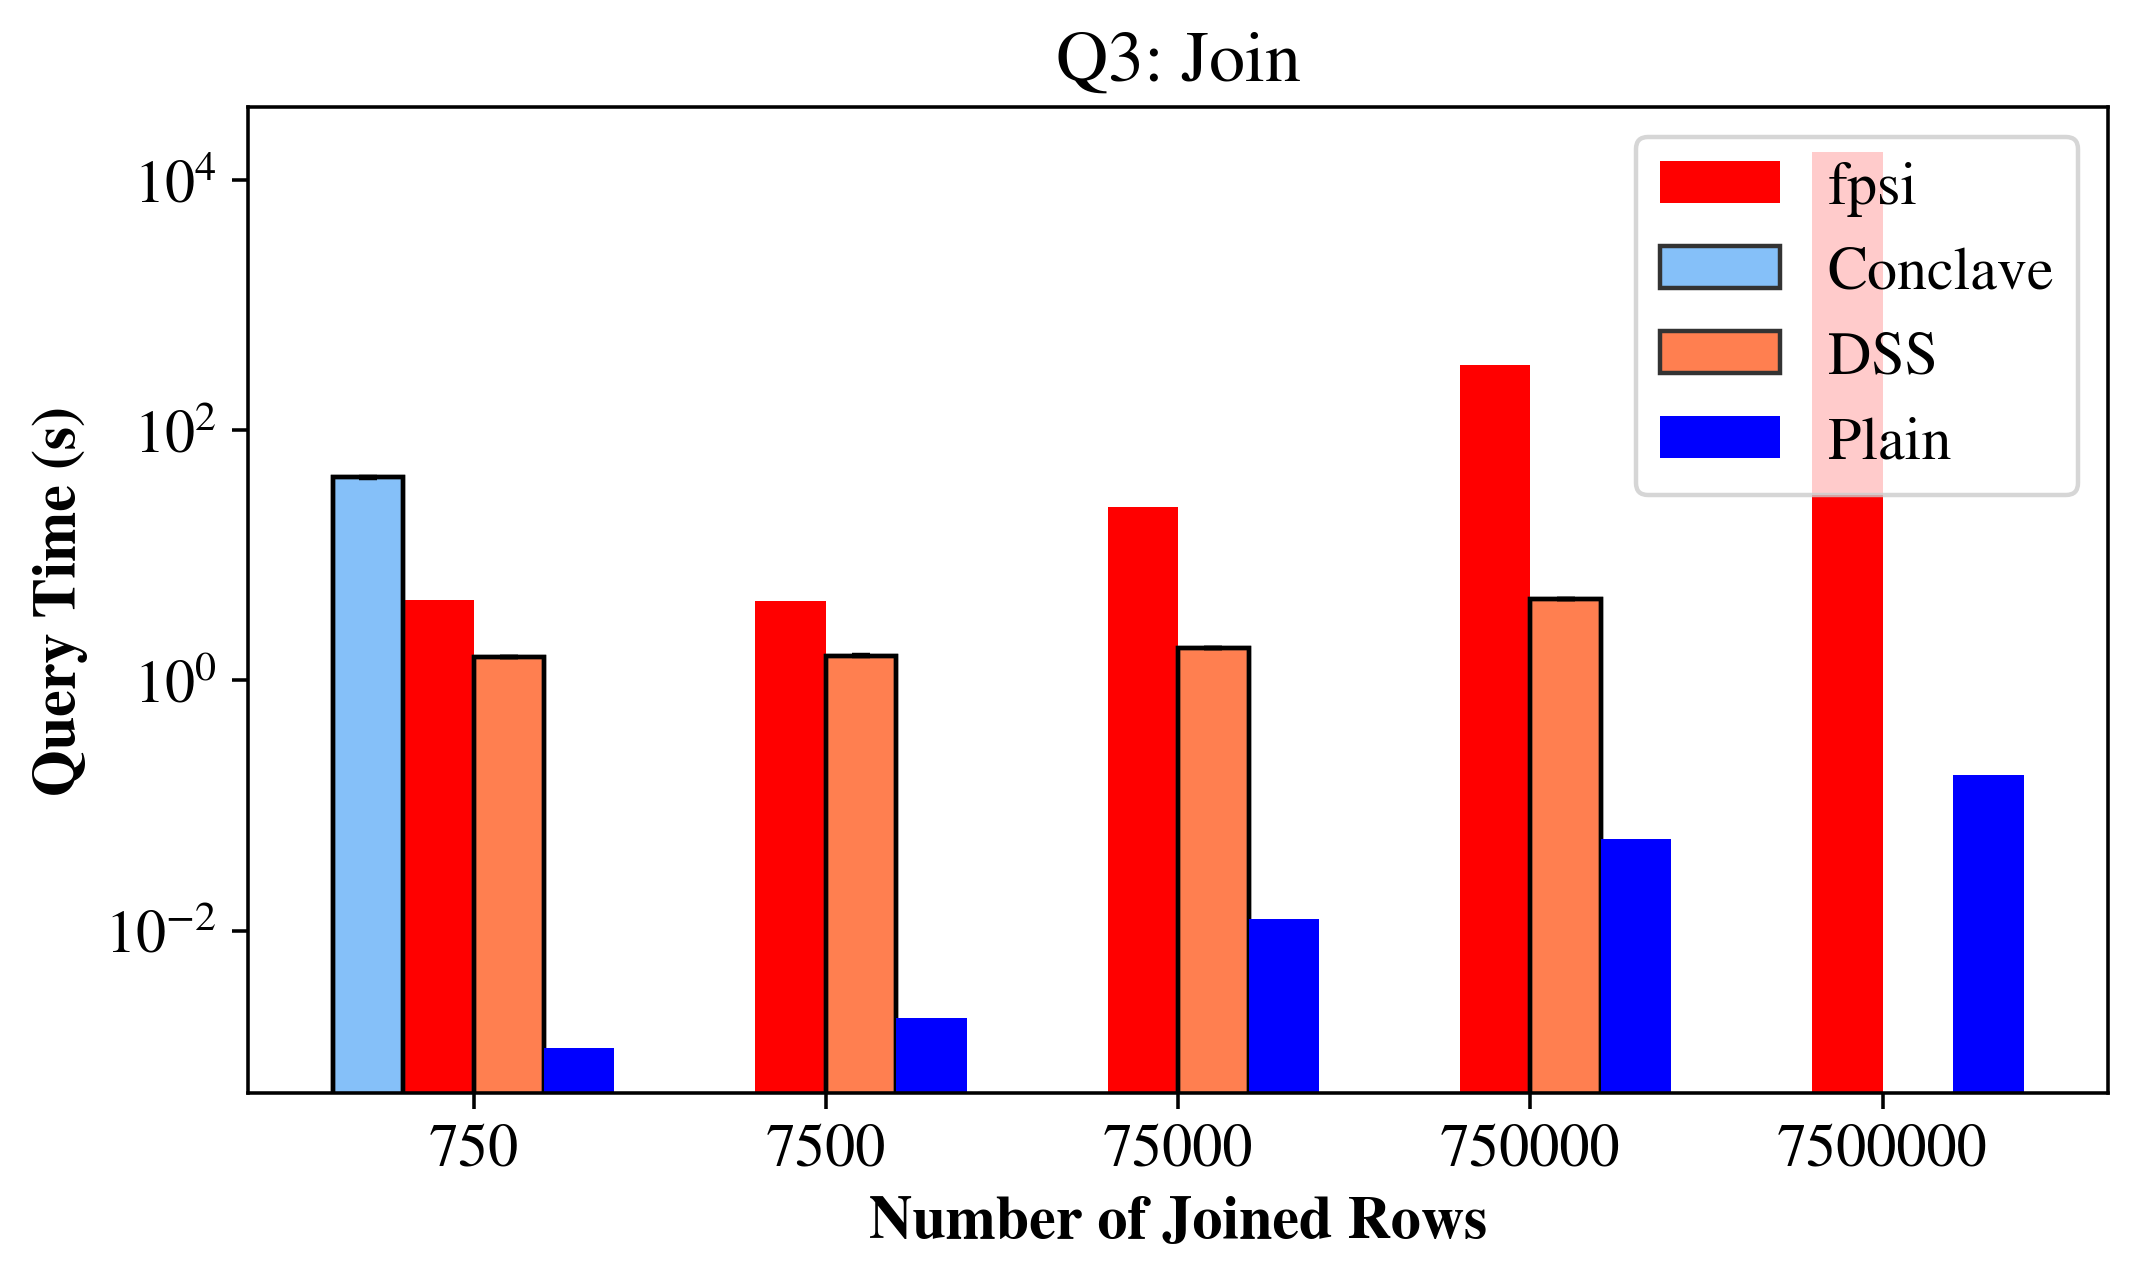

In [13]:
data_left = data_query_dict[5]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[3]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(4)+1

X_axis_large = np.arange(5) + 1

width = 0.2

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(medians_left)

left_x = [float("nan") if not np.isnan(row) else 0 for row in medians_left]

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

fpsi_hts = [fpsi_arr[i][0] for i in range(5)]
print(fpsi_hts)

join_hts_mmm = [raw_mmm(col) for col in join_arr]
medians_join = [row[1] for row in join_hts_mmm]
# join_hts = [join_arr[i][1] for i in range(4)]

print(X_axis)

plt.bar(x=X_axis_large-width/2, width=width, height = fpsi_hts, label = "fpsi", color='red')

plt.bar(x=X_axis-width/2-width,width=width,height=medians_left,label="Conclave",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2-width,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="DS",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

print(left_x)
plt.scatter(np.arange(4)+1-width/3, left_x, [240]*4,
           edgecolors='black',
           marker='x',
           color = "black",
           zorder=100,
           clip_on=False,
           linewidths=2.5,
            )

plt.scatter(np.arange(4)+1-width/3,left_x, [220]*4,
            edgecolors='black',
            marker='x',
            color = "#85C0F9",
            zorder=100,
            clip_on=False,
            linewidths=1,
            )

plt.bar(x=X_axis_large+width/2+width, width=width, height = medians_join, label = "Plain", color='blue')

plt.yscale('log')

plt.xlabel("Number of Joined Rows", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.legend()

plt.xticks(X_axis_large, [750,7500,75000,750000,7500000])

plt.savefig("q4.pdf", bbox_inches='tight')

plt.show()